+ **NOTE**: This notebook is trained on Google Colaboratory

# Importing useful libraries

In [0]:
import os
import random
import zipfile
import numpy as np

import matplotlib.image as mpImg
import matplotlib.pyplot as plt
%matplotlib inline

# Setting Dataset

In [0]:
# from google.colab import files
# files.upload() #upload kaggle.json

In [3]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp '/content/drive/My Drive/Colab Notebooks/kaggle.json' ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

kaggle.json


In [4]:
!kaggle datasets download -d dansbecker/5-celebrity-faces-dataset -p /tmp/

 99% 5.00M/5.03M [00:00<00:00, 32.5MB/s]
100% 5.03M/5.03M [00:00<00:00, 32.2MB/s]


In [0]:
local_training_zip = '/tmp/5-celebrity-faces-dataset.zip'
if zipfile.is_zipfile(local_training_zip):
    zip_ref = zipfile.ZipFile(file=local_training_zip, mode='r')
    zip_ref.extractall('/tmp/')
    zip_ref.close()

In [6]:
for i in os.listdir('/tmp/data/train/'):
    print('No. of ' + i + ' in training set: ', len(os.listdir('/tmp/data/train/'+i+'/')))
    print('No. of ' + i + ' in val set: ', len(os.listdir('/tmp/data/val/'+i+'/')))

No. of ben_afflek in training set:  14
No. of ben_afflek in val set:  5
No. of mindy_kaling in training set:  22
No. of mindy_kaling in val set:  5
No. of jerry_seinfeld in training set:  21
No. of jerry_seinfeld in val set:  5
No. of madonna in training set:  19
No. of madonna in val set:  5
No. of elton_john in training set:  17
No. of elton_john in val set:  5


Random 5 images of ben_afflek, mindy_kaling, jerry_seinfeld, madonna, elton_john


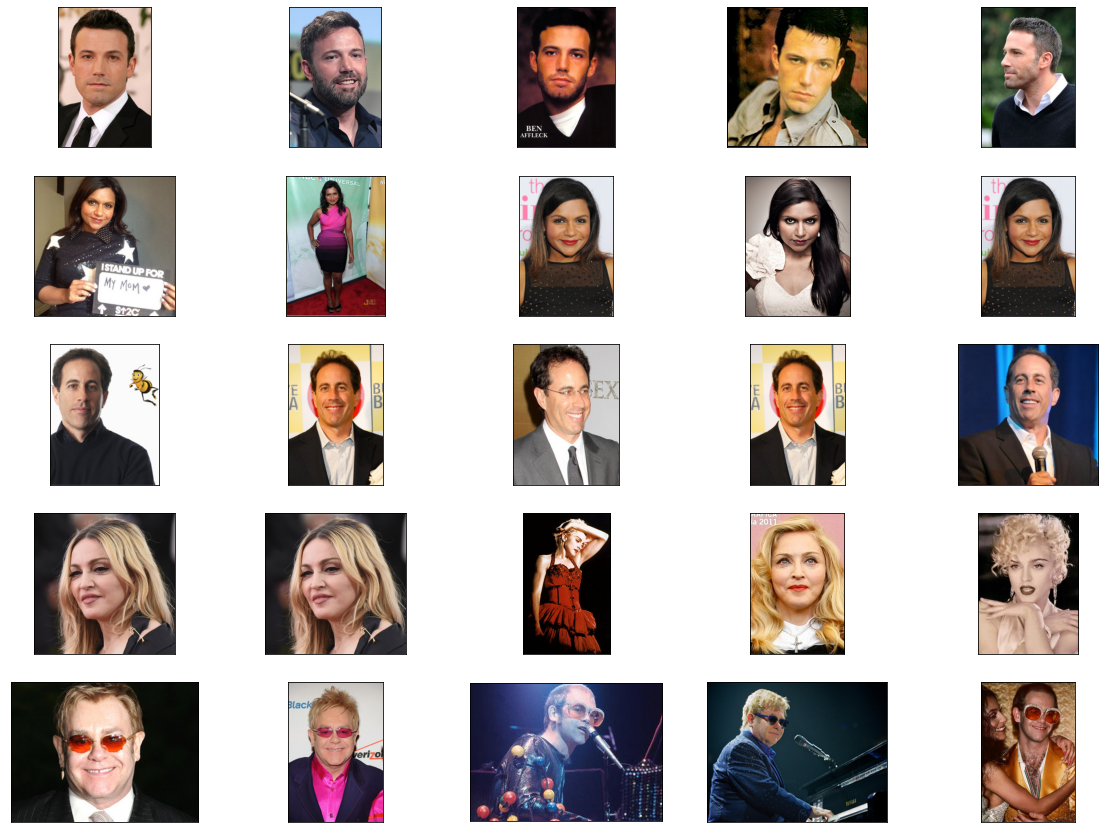

In [7]:
plt.figure(figsize=(20, 15))

celeb_names = os.listdir('/tmp/data/train/')
print('Random 5 images of '+', '.join(celeb_names))
for i, j in enumerate(celeb_names):
    for k in range(5):
        celeb_dir = '/tmp/data/train/'+j+'/'
        img_name = random.choice(os.listdir(celeb_dir))
        img = mpImg.imread(celeb_dir+img_name)
        plt.subplot(len(celeb_names), 5, 5*i+k+1)
        plt.xticks(ticks=[])
        plt.yticks(ticks=[])
        plt.imshow(img)

# Using DeepFace Library

+ Reference: https://github.com/serengil/deepface

In [8]:
!pip install -q deepface
import deepface
from deepface import DeepFace

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done


Using TensorFlow backend.


Directory  /root /.deepface created
Directory  /root /.deepface/weights created


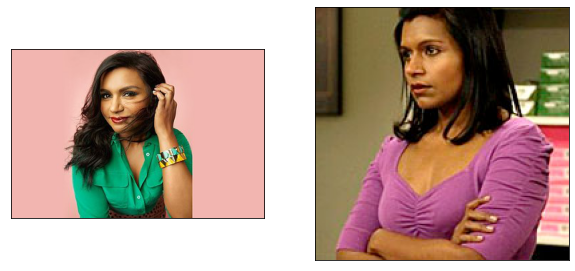

In [9]:
plt.figure(figsize=(10, 7))

img_name = random.choice(os.listdir('/tmp/data/train/mindy_kaling/'))
img1_path = '/tmp/data/train/mindy_kaling/' + img_name
img1 = mpImg.imread(img1_path)
plt.subplot(1, 2, 1)
plt.xticks(ticks=[])
plt.yticks(ticks=[])
plt.imshow(img1)

img_name = random.choice(os.listdir('/tmp/data/train/mindy_kaling/'))
img2_path = '/tmp/data/train/mindy_kaling/' + img_name
img2 = mpImg.imread(img2_path)
plt.subplot(1, 2, 2)
plt.xticks(ticks=[])
plt.yticks(ticks=[])
plt.imshow(img2)

In [10]:
c = 1
try:
    DeepFace.detectFace(img1_path)
    DeepFace.detectFace(img2_path)
except:
    print('No face detected in one of the images!')
    c = 0

if c:
    result = DeepFace.verify(img1_path, img2_path, model_name='VGG-Face', distance_metric='cosine')
    # DeepFace.verify(img1_path, img2_path, model_name='VGG-Face', distance_metric='euclidean')
    # DeepFace.verify(img1_path, img2_path, model_name='VGG-Face', distance_metric='euclidean_l2')

    # dataset = [
    # 	['dataset/img1.jpg', 'dataset/img2.jpg'],
    # 	['dataset/img1.jpg', 'dataset/img3.jpg']
    # ]
    # DeepFace.verify(dataset)
    print(result)

Using VGG-Face model backend and cosine distance.
vgg_face_weights.h5 will be downloaded...


Downloading...
From: https://drive.google.com/uc?id=1CPSeum3HpopfomUEK1gybeuIVoeJT_Eo
To: /root/.deepface/weights/vgg_face_weights.h5
580MB [00:11, 51.6MB/s]
Verification:   0%|          | 0/1 [00:07<?, ?it/s]

{'verified': True, 'distance': 0.3564855456352234, 'max_threshold_to_verify': 0.4, 'model': 'VGG-Face', 'similarity_metric': 'cosine'}


In [11]:
dir(deepface.basemodels)[:-9]

['Facenet', 'FbDeepFace', 'OpenFace', 'VGGFace']

In [12]:
demography = deepface.DeepFace.analyze(img1)                                      #passing nothing as 2nd argument will find everything
#demography = DeepFace.analyze("img4.jpg", ['age', 'gender', 'race', 'emotion'])  #identical to the line above
#demographies = DeepFace.analyze(["img1.jpg", "img2.jpg", "img3.jpg"])            #analyzing multiple faces same time
demography

Actions to do:  ['emotion', 'age', 'gender', 'race']
facial_expression_model_weights.h5 will be downloaded...


Downloading...
From: https://drive.google.com/uc?id=13iUHHP3SlNg53qSuQZDdHDSDNdBP9nwy
To: /root/.deepface/weights/facial_expression_model_weights.zip
5.54MB [00:00, 22.0MB/s]


age_model_weights.h5 will be downloaded...


Downloading...
From: https://drive.google.com/uc?id=1YCox_4kJ-BYeXq27uUbasu--yz28zUMV
To: /root/.deepface/weights/age_model_weights.h5
539MB [00:09, 55.8MB/s]


gender_model_weights.h5 will be downloaded...


Downloading...
From: https://drive.google.com/uc?id=1wUXRVlbsni2FN9-jkS_f4UTUrm1bRLyk
To: /root/.deepface/weights/gender_model_weights.h5
537MB [00:18, 28.9MB/s]


race_model_single_batch.h5 will be downloaded...


Downloading...
From: https://drive.google.com/uc?id=1nz-WDhghGQBC4biwShQ9kYjvQMpO6smj
To: /root/.deepface/weights/race_model_single_batch.zip
511MB [00:15, 32.6MB/s]
Analyzing:   0%|          | 0/1 [00:01<?, ?it/s]


{'age': 29.62838617516133,
 'dominant_emotion': 'happy',
 'dominant_race': 'latino hispanic',
 'emotion': {'angry': 0.006850760837551206,
  'disgust': 2.0585015914065252e-07,
  'fear': 0.12354034697636962,
  'happy': 73.3087956905365,
  'neutral': 26.11928880214691,
  'sad': 0.04812638508155942,
  'surprise': 0.3933978732675314},
 'gender': 'Woman',
 'race': {'asian': 6.572708134216555,
  'black': 3.568144355305693,
  'indian': 7.021143705913049,
  'latino hispanic': 55.68809245157793,
  'middle eastern': 8.692949783381806,
  'white': 18.45696082454686}}

# Other Implementation

## Getting Embeddings

### Using 'keras-facenet' & 'mira' library

+ Reference: https://github.com/faustomorales/keras-facenet

+ 'keras-facenet' expects us to provide cropped images of faces and does not ship with a face detector.
+ Hence, we will use 'mira' to extract faces with the built-in MTCNN model.
+ Then we will pass it to 'FaceNet' to get embeddings.

In [13]:
!pip install -q keras-facenet
from keras_facenet import FaceNet

!pip install -q mira
from mira.detectors import MTCNN

     |████████████████████████████████| 102kB 11.8MB/s 


In [0]:
img_name = random.choice(os.listdir('/tmp/data/train/mindy_kaling/'))
img_path = '/tmp/data/train/mindy_kaling/' + img_name
img = mpImg.imread(img_path)
# img = np.expand_dims(img, axis=0)

In [15]:
detector = MTCNN()
embedder = FaceNet()

faces = detector.detect(img)
embeddings = embedder.embeddings([
    face.selection.extract(img) for face in faces if face.score>0.5
])

In [16]:
embeddings.shape

(1, 512)

In [17]:
embeddings

array([[-2.91099399e-02,  5.54525107e-03, -4.12265658e-02,
        -4.89806160e-02, -4.99817601e-04, -6.79002851e-02,
         1.02713995e-01,  1.66909024e-02,  1.88351925e-02,
         1.25278356e-02, -9.20806304e-02,  1.66228134e-02,
         4.90955114e-02, -1.30679030e-02, -1.02602214e-01,
        -3.34245642e-03, -2.12072581e-02, -4.61823976e-04,
         3.33025530e-02,  1.49587011e-02, -2.49050222e-02,
         4.62808311e-02, -1.10858027e-02,  1.97731802e-04,
         6.77722096e-02, -2.65699662e-02, -5.12284134e-03,
        -7.62138516e-02, -4.00988683e-02,  3.78526375e-02,
         7.34966993e-02,  2.30823848e-02,  2.22398415e-02,
        -4.41321321e-02,  4.40241117e-03,  1.40986936e-02,
        -6.47450536e-02,  5.29159009e-02, -5.33437636e-03,
         1.52290137e-02, -7.76537135e-02, -1.82901379e-02,
         4.97549772e-02,  2.08926238e-02, -3.12808231e-02,
         3.08722816e-03, -9.86801535e-02,  2.79204408e-03,
        -1.89236216e-02, -1.01535534e-02,  6.76803291e-0

### Using 'FaceNet' model & 'MTCNN' library

+ References:
    - https://machinelearningmastery.com/how-to-develop-a-face-recognition-system-using-facenet-in-keras-and-an-svm-classifier/
    - https://github.com/ipazc/mtcnn
    - https://kpzhang93.github.io/MTCNN_face_detection_alignment/
    - https://github.com/davidsandberg/facenet
    - https://sefiks.com/2018/08/06/deep-face-recognition-with-keras/
    - https://jekel.me/2018/512_vs_128_facenet_embedding_application_in_Tinder_data/

+ We will use MTCNN for detecting & extracting faces.

In [18]:
!pip install -q mtcnn
from mtcnn import MTCNN

import cv2

     |████████████████████████████████| 2.3MB 15.8MB/s 


In [0]:
# extract a single face from a given photograph
def extract_face(img_path):
    # load image
    img = mpImg.imread(img_path)
    
    # removing alpha channel if present
    if(len(img.shape)>2):
        if(img.shape[2]==4):
            img = img[:, :, :3]
    else:
        # img = np.expand_dims(img, axis=2)
        os.remove(img_path)
        return [], []

	# create the detector, using default weights
    detector = MTCNN()

	# detect faces in the image
    results = detector.detect_faces(img)

    # extract the bounding box from the first face
    x1, y1, width, height = results[0]['box']
    
    # bug fix
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height
    
    # extract the face
    face = img[y1:y2, x1:x2]
    
    return face, results

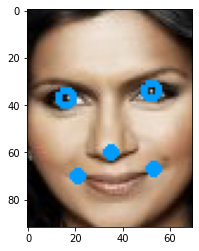

In [76]:
img_name = random.choice(os.listdir('/tmp/data/train/mindy_kaling/'))
img_path = '/tmp/data/train/mindy_kaling/' + img_name
chk = extract_face(img_path)

left_eye = tuple(np.array(chk[1][0]['keypoints']['left_eye']) - np.array(chk[1][0]['box'][:2]))
right_eye = tuple(np.array(chk[1][0]['keypoints']['right_eye']) - np.array(chk[1][0]['box'][:2]))
nose = tuple(np.array(chk[1][0]['keypoints']['nose']) - np.array(chk[1][0]['box'][:2]))
mouth_left = tuple(np.array(chk[1][0]['keypoints']['mouth_left']) - np.array(chk[1][0]['box'][:2]))
mouth_right = tuple(np.array(chk[1][0]['keypoints']['mouth_right']) - np.array(chk[1][0]['box'][:2]))

cv2.circle(chk[0], left_eye, 3, (0,155,255), 2)
cv2.circle(chk[0], right_eye, 3, (0,155,255), 2)
cv2.circle(chk[0], nose, 2, (0,155,255), 2)
cv2.circle(chk[0], mouth_left, 2, (0,155,255), 2)
cv2.circle(chk[0], mouth_right, 2, (0,155,255), 2)

plt.imshow(chk[0])

+ The load_dataset() function below takes a directory name such as ‘5-celebrity-faces-dataset/train/‘ and detects faces for each subdirectory (celebrity), assigning labels to each detected face.
+ It returns the X and y elements of the dataset as NumPy arrays.

In [0]:
# load images and extract faces for all images in a directory
def load_faces(directory):
    faces = list()
    
    # enumerate files
    for filename in os.listdir(directory):
        path = directory + filename
        
        # get face
        img = extract_face(path)[0]

        if(img!=[]):
            # resizing to model requirement
            # face = cv2.resize(img, (160, 160))
            face = cv2.resize(img, (224, 224))
            
            # store
            faces.append(face)
        
    return faces

In [0]:
# load a dataset that contains one subdir for each class that in turn contains images
def load_dataset(directory):
	X, y = list(), list()
 
	# enumerate folders, on per class
	for subdir in os.listdir(directory):
		path = directory + subdir + '/'

		# skip any files that might be in the dir
		if not os.path.isdir(path):
			continue

		# load all faces in the subdirectory
		faces = load_faces(path)
  
		# create labels
		labels = [subdir for _ in range(len(faces))]

		# summarize progress
		print('>loaded %d examples for class: %s' % (len(faces), subdir))
  
		# store
		X.extend(faces)
		y.extend(labels)
  
	return np.asarray(X), np.asarray(y)

In [100]:
# load train dataset
trainX, trainy = load_dataset('/tmp/data/train/')
print(trainX.shape, trainy.shape)

# load test dataset
testX, testy = load_dataset('/tmp/data/val/')
print(testX.shape, testy.shape)

# save arrays to one file in compressed format
np.savez_compressed('/tmp/5-celebrity-faces-dataset.npz', trainX, trainy, testX, testy)

>loaded 14 examples for class: ben_afflek
>loaded 22 examples for class: mindy_kaling
>loaded 21 examples for class: jerry_seinfeld
>loaded 19 examples for class: madonna
>loaded 17 examples for class: elton_john
(93, 224, 224, 3) (93,)
>loaded 5 examples for class: ben_afflek
>loaded 5 examples for class: mindy_kaling
>loaded 5 examples for class: jerry_seinfeld
>loaded 4 examples for class: madonna
>loaded 5 examples for class: elton_john
(24, 224, 224, 3) (24,)


In [101]:
# load the face dataset
data = np.load('/tmp/5-celebrity-faces-dataset.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print('Loaded: ', trainX.shape, trainy.shape, testX.shape, testy.shape)

Loaded:  (93, 224, 224, 3) (93,) (24, 224, 224, 3) (24,)


+ We will use the pre-trained Keras FaceNet model.

In [0]:
# downloading files from google drive using share link (gdown or googledrivedownloader)
!pip install -q gdown
import gdown

In [31]:
# This was trained on 'VGGFace2' dataset and 'Inception ResNet v1' architecture.
# It expects image size to be of (224, 224, 3).
# It outputs a face embedding as a 512 element vector.
gdown.download('https://drive.google.com/uc?id=1EXPBSXwTaqrSC0OhUdXNmKSh9qJUQ55-', '/tmp/20180402-114759.zip', quiet=False)

# This was trained on 'MS-Celeb-1M dataset' dataset.
# It expects image size to be of (160, 160, 3) & to have their pixel values whitened (standardized across all three channels).
# It outputs a face embedding as a 128 element vector.
gdown.download('https://drive.google.com/file/d/1PZ_6Zsy1Vb0s0JmjEmVd8FS99zoMCiN1/uc?usp=sharing', '/tmp/facenet_keras.h5', quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1EXPBSXwTaqrSC0OhUdXNmKSh9qJUQ55-
To: /tmp/20180402-114759.zip
192MB [00:22, 8.72MB/s]
Downloading...
From: https://drive.google.com/file/d/1PZ_6Zsy1Vb0s0JmjEmVd8FS99zoMCiN1/uc?usp=sharing
To: /tmp/facenet_keras.h5
2.79kB [00:00, 239kB/s]


'/tmp/facenet_keras.h5'

In [0]:
local_training_zip = '/tmp/20180402-114759.zip'
if zipfile.is_zipfile(local_training_zip):
    zip_ref = zipfile.ZipFile(file=local_training_zip, mode='r')
    zip_ref.extractall('/tmp/')
    zip_ref.close()

+ Loading model fails as it is either a pre-trained model or pre-trained weights & can't find the architecture on net.

In [0]:
# load the model
import tensorflow as tf

loc = '/tmp/20180402-114759/'
for i in os.listdir(loc):
    file_path = loc + i
    os.rename(file_path, loc+'saved_model.'+file_path.split('.', maxsplit=1)[1])


# model = tf.keras.models.load_model('/tmp/20180402-114759')

# can't find the model
# model.load_weights('/tmp/20180402-114759')

# summarize input and output shape
# print(model.inputs)
# print(model.outputs)

+ Can't load the model

In [0]:
# # load the model
# import tensorflow as tf

# model = tf.keras.models.load_model('/tmp/facenet_keras.h5')

# # summarize input and output shape
# print(model.inputs)
# print(model.outputs)

+ Therefore, using 'keras-facenet' model for extracting embeddings.

In [0]:
# get the face embedding for one face
def get_embedding(model, face_pixels):
	# scale pixel values
	face_pixels = face_pixels.astype('float32')
 
	# standardize pixel values across channels (global)
	mean, std = face_pixels.mean(), face_pixels.std()
	face_pixels = (face_pixels - mean) / std

	# transform face into one sample
	samples = np.expand_dims(face_pixels, axis=0)
 
	# make prediction to get embedding
	# yhat = model.predict(samples)
	yhat = model.embeddings(samples)
	return yhat[0]

In [103]:
# convert each face in the train set to an embedding
newTrainX = list()
for face_pixels in trainX:
	# embedding = get_embedding(model, face_pixels)
	embedding = get_embedding(embedder, face_pixels)
	newTrainX.append(embedding)
 
newTrainX = np.asarray(newTrainX)
print(newTrainX.shape)

# convert each face in the test set to an embedding
newTestX = list()
for face_pixels in testX:
	# embedding = get_embedding(model, face_pixels)
	embedding = get_embedding(embedder, face_pixels)
	newTestX.append(embedding)

newTestX = np.asarray(newTestX)
print(newTestX.shape)

# save arrays to one file in compressed format
np.savez_compressed('/tmp/5-celebrity-faces-embeddings.npz', newTrainX, trainy, newTestX, testy)

(93, 512)
(24, 512)


In [104]:
# load dataset of embeddings
data = np.load('/tmp/5-celebrity-faces-embeddings.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print('Dataset-Embedding: train=%d, test=%d' % (trainX.shape[0], testX.shape[0]))

Dataset-Embedding: train=93, test=24


## One-Shot learning using Siamese Network

+ Next, the data requires some minor preparation prior to modeling.
+ First, it is a good practice to normalize the face embedding vectors because the vectors are often compared to each other using a distance metric.

In [0]:
import sklearn

In [0]:
# normalize input vectors
in_encoder = sklearn.preprocessing.Normalizer(norm='l2')

trainX = in_encoder.transform(trainX)
testX = in_encoder.transform(testX)

+ Next, the string target variables for each celebrity name need to be converted to integers.

In [0]:
# label encode targets
out_encoder = sklearn.preprocessing.LabelEncoder()
out_encoder.fit(trainy)

trainy = out_encoder.transform(trainy)
testy = out_encoder.transform(testy)

In [108]:
trainy

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

In [109]:
trainy.shape

(93,)

+ Next, we can fit a model.

In [110]:
from sklearn.svm import SVC
model = SVC(kernel='linear', probability=True)
model.fit(trainX, trainy)

# predict
yhat_train = model.predict(trainX)
yhat_test = model.predict(testX)

# score
score_train = sklearn.metrics.accuracy_score(trainy, yhat_train)
score_test = sklearn.metrics.accuracy_score(testy, yhat_test)

# summarize
print('Accuracy: train=%.3f, test=%.3f' % (score_train*100, score_test*100))

Accuracy: train=23.656, test=20.833


In [111]:
# test model on a random example from the test dataset
selection = random.choice([i for i in range(testX.shape[0])])
# random_face_pixels = testX_faces[selection]
random_face_emb = testX[selection]
random_face_class = testy[selection]
random_face_name = out_encoder.inverse_transform([random_face_class])

# prediction for the face
samples = np.expand_dims(random_face_emb, axis=0)
yhat_class = model.predict(samples)
yhat_prob = model.predict_proba(samples)

# get name
class_index = yhat_class[0]
class_probability = yhat_prob[0,class_index] * 100
predict_names = out_encoder.inverse_transform(yhat_class)

print('Predicted: %s (%.3f)' % (predict_names[0], class_probability))
print('Expected: %s' % random_face_name[0])

Predicted: mindy_kaling (19.964)
Expected: ben_afflek
